1. Load Data
2. Clean Data
3. Explore
4. Engineer Features
5. Visualize / Model / Make Decisions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load Data

In this step, we load the csv file `raw.csv` into a pandas DataFrame and display the first few rows to get a sense of the dataset.

In [3]:
# Load the Excel file
df = pd.read_csv('./dataset/raw.csv')

# Show basic info
print("Dataset loaded successfully")
print("Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())

# Preview the first 5 rows
df.head()

Dataset loaded successfully
Shape: (113037, 16)

Column Names: ['Date', 'Customer ID', 'Customer Age', 'Age Group', 'Customer Gender', 'Country', 'State', 'Product Category', 'Sub Category', 'Product', 'Order Quantity', 'Unit Cost', 'Unit Price', 'Cost', 'Revenue', 'Profit']


,Date,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
0,26/11/2013,11019.0,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,360.0,950,590.0
1,26/11/2015,11019.0,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,360.0,950,590.0
2,23/03/2014,11039.0,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1035.0,2401,1366.0
3,23/03/2016,11039.0,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,900.0,2088,1188.0
4,15/05/2014,11046.0,47.0,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,180.0,418,238.0


## Clean Data
In this step, we analyze the missing data in the dataset to decide how to clean it. We’ll visualize the missing value counts and percentages to better understand which columns may need to be dropped, filled, or handled carefully.

In [4]:
# Count of missing values per column
missing_count = df.isnull().sum()

# Percentage of missing values
missing_percent = (missing_count / len(df)) * 100

# Combine into a single DataFrame
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percent
}).sort_values(by='Missing %', ascending=False)

# Display the table
display(missing_df)

,Missing Count,Missing %
Customer ID,1,0.000885
Customer Age,1,0.000885
Age Group,1,0.000885
Customer Gender,1,0.000885
State,1,0.000885
Country,1,0.000885
Product Category,1,0.000885
Sub Category,1,0.000885
Profit,1,0.000885
Product,1,0.000885


as all the count not exceeding 1 .. so it's very low percentage so we can remove the null values

In [5]:
df.dropna()

,Date,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
0,26/11/2013,11019.0,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,360.0,950,590.0
1,26/11/2015,11019.0,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,360.0,950,590.0
2,23/03/2014,11039.0,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1035.0,2401,1366.0
3,23/03/2016,11039.0,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,900.0,2088,1188.0
4,15/05/2014,11046.0,47.0,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,180.0,418,238.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-12-04 00:00:00,29443.0,41.0,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3.0,24.0,64.0,72.0,184,112.0
113032,2014-02-04 00:00:00,29462.0,18.0,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22.0,24.0,64.0,528.0,1183,655.0
113033,2016-02-04 00:00:00,29462.0,18.0,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22.0,24.0,64.0,528.0,1183,655.0
113034,2014-04-03 00:00:00,29472.0,37.0,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24.0,24.0,64.0,576.0,1260,684.0


In [6]:
# Fix data types safely
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')                     # convert to datetime
df['Customer Age'] = df['Customer Age'].astype('Int64')                     # nullable integer
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')              # convert to float safely


C:\Users\patti\AppData\Local\Temp\ipykernel_19096\3023965378.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')                     # convert to datetime


checking on inconsistant values

In [7]:
# Select likely categorical columns to inspect
cat_cols = ['Customer Gender', 'Country', 'State', 'Age Group', 'Product Category']

# Show unique values (raw) for manual inspection
for col in cat_cols:
    print(f"\nUnique values in '{col}':")
    print(sorted(df[col].dropna().unique()))



Unique values in 'Customer Gender':
['F', 'M']

Unique values in 'Country':
['Australia', 'Canada', 'France', 'Germany', 'United Kingdom', 'United States']

Unique values in 'State':
['Alabama', 'Alberta', 'Arizona', 'Bayern', 'Brandenburg', 'British Columbia', 'California', 'Charente-Maritime', 'England', 'Essonne', 'Florida', 'Garonne (Haute)', 'Georgia', 'Hamburg', 'Hauts de Seine', 'Hessen', 'Illinois', 'Kentucky', 'Loir et Cher', 'Loiret', 'Massachusetts', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Moselle', 'New South Wales', 'New York', 'Nord', 'Nordrhein-Westfalen', 'North Carolina', 'Ohio', 'Ontario', 'Oregon', 'Pas de Calais', 'Queensland', 'Saarland', 'Seine (Paris)', 'Seine Saint Denis', 'Seine et Marne', 'Somme', 'South Australia', 'South Carolina', 'Tasmania', 'Texas', 'Utah', "Val d'Oise", 'Val de Marne', 'Victoria', 'Virginia', 'Washington', 'Wyoming', 'Yveline']

Unique values in 'Age Group':
['Adults (35-64)', 'Seniors (64+)', 'Young Adults (25-34)', 'Youth 

make the headers to be formatted

In [8]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [9]:
df.head()

,date,customer_id,customer_age,age_group,customer_gender,country,state,product_category,sub_category,product,order_quantity,unit_cost,unit_price,cost,revenue,profit
0,2013-11-26,11019.0,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,360.0,950,590.0
1,2015-11-26,11019.0,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,360.0,950,590.0
2,2014-03-23,11039.0,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1035.0,2401,1366.0
3,2016-03-23,11039.0,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,900.0,2088,1188.0
4,2014-05-15,11046.0,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,180.0,418,238.0


## Feature Engineering

We add new features to enrich the dataset and prepare for deeper analysis or machine learning. These features include:
- Profit Margin
- Year-Month from Date
- High Profit Flag
- Encoded categorical variables

In [10]:
# 1. Profit Margin
df['profit_margin'] = df['profit'] / df['revenue']
df['profit_margin'] = df['profit_margin'].replace([np.inf, -np.inf], np.nan)


# 2. Year-Month from Date
df['year-month'] = df['date'].dt.to_period('M').astype(str)

# 3. Is High Profit (binary flag)
df['is_high_profit_value'] = df['profit'] > 100
df['is_high_profit_margin'] = df['profit_margin'] > 0.3

# 4. Encode categorical variables (example with 'Customer Gender')
# You can extend this with One-Hot Encoding or Label Encoding
df['gender_code'] = df['customer_gender'].astype('category').cat.codes

# Check new features
df.head()


,date,customer_id,customer_age,age_group,customer_gender,country,state,product_category,sub_category,product,...,unit_cost,unit_price,cost,revenue,profit,profit_margin,year-month,is_high_profit_value,is_high_profit_margin,gender_code
0,2013-11-26,11019.0,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,...,45.0,120.0,360.0,950,590.0,0.621053,2013-11,True,True,1
1,2015-11-26,11019.0,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,...,45.0,120.0,360.0,950,590.0,0.621053,2015-11,True,True,1
2,2014-03-23,11039.0,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,...,45.0,120.0,1035.0,2401,1366.0,0.568930,2014-03,True,True,1
3,2016-03-23,11039.0,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,...,45.0,120.0,900.0,2088,1188.0,0.568966,2016-03,True,True,1
4,2014-05-15,11046.0,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,...,45.0,120.0,180.0,418,238.0,0.569378,2014-05,True,True,0


## EDA

In [11]:
# pd.

## Customer Insights

### Which age groups are the most profitable?

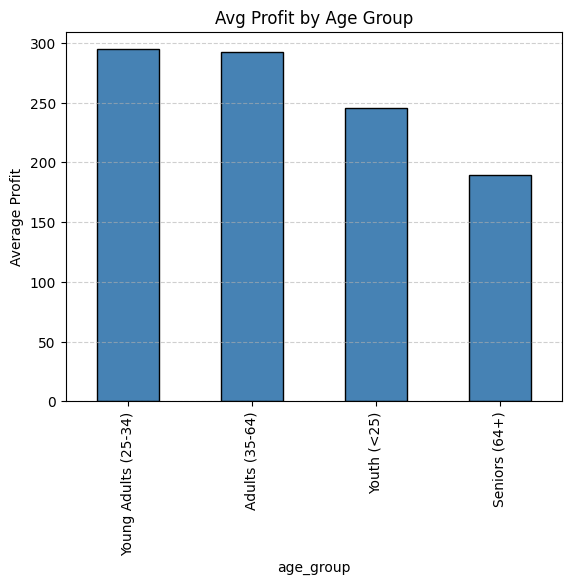

In [12]:
import matplotlib.pyplot as plt

df.groupby('age_group')['profit'].mean().sort_values(ascending=False).plot(
    kind='bar', color='steelblue', edgecolor='black', title='Avg Profit by Age Group'
)
plt.ylabel('Average Profit')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### Do Male or Female Customers Generate More Profit?

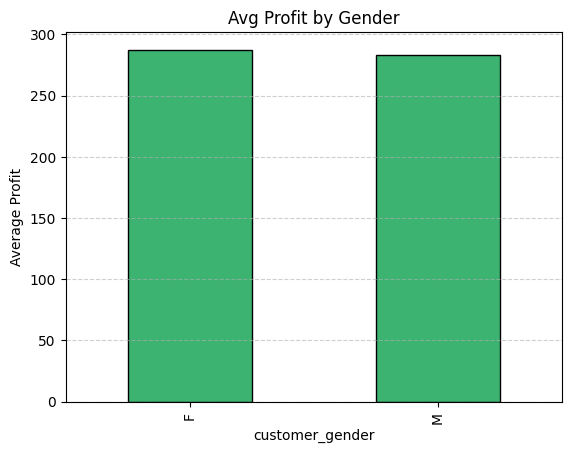

In [13]:
df.groupby('customer_gender')['profit'].mean().sort_values(ascending=False).plot(
    kind='bar', color='mediumseagreen', edgecolor='black', title='Avg Profit by Gender'
)
plt.ylabel('Average Profit')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### Which segments have the highest of high-profit orders?

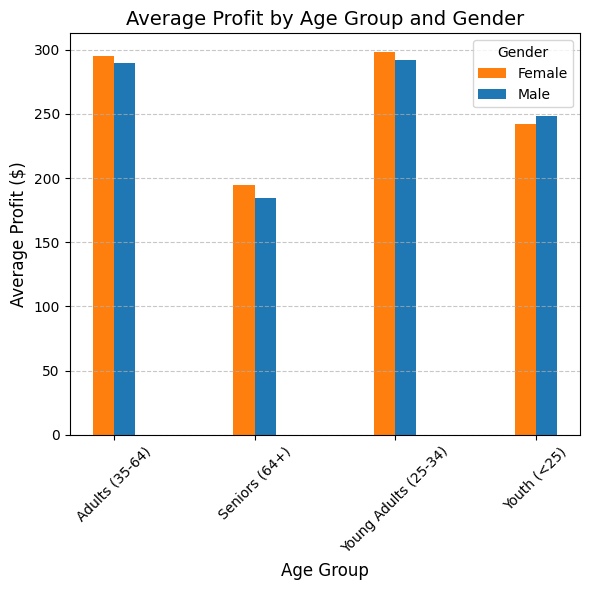

In [14]:
# Calculate average profit by age group and gender
pivot_table = df.pivot_table(values='profit', 
                            index='age_group', 
                            columns='customer_gender', 
                            aggfunc='mean')

# Plotting the grouped bar chart
plt.figure(figsize=(6, 6))
# Get the number of age groups and set bar width
age_groups = pivot_table.index
n_groups = len(age_groups)
bar_width = 0.15
index = np.arange(n_groups)

# Plot bars for Female and Male
plt.bar(index, pivot_table['F'], bar_width, label='Female', color='#ff7f0e')
plt.bar(index + bar_width, pivot_table['M'], bar_width, label='Male', color='#1f77b4')

# Customize the plot
plt.title('Average Profit by Age Group and Gender', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Profit ($)', fontsize=12)
plt.xticks(index + bar_width / 2, age_groups, rotation=45)
plt.legend(title='Gender')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Geographical Analysis

1. **Which regions have the highest number of orders?**
   > Identify where your largest customer base is located.

2. **Which regions generate the most revenue?**
   > Discover where customers are spending the most.

3. **Which regions bring in the highest profit?**
   > Find out which areas contribute most to the bottom line.

4. **Which regions have the highest percentage of high-profit orders?**
   > Understand where transactions are most profitable in terms of efficiency.

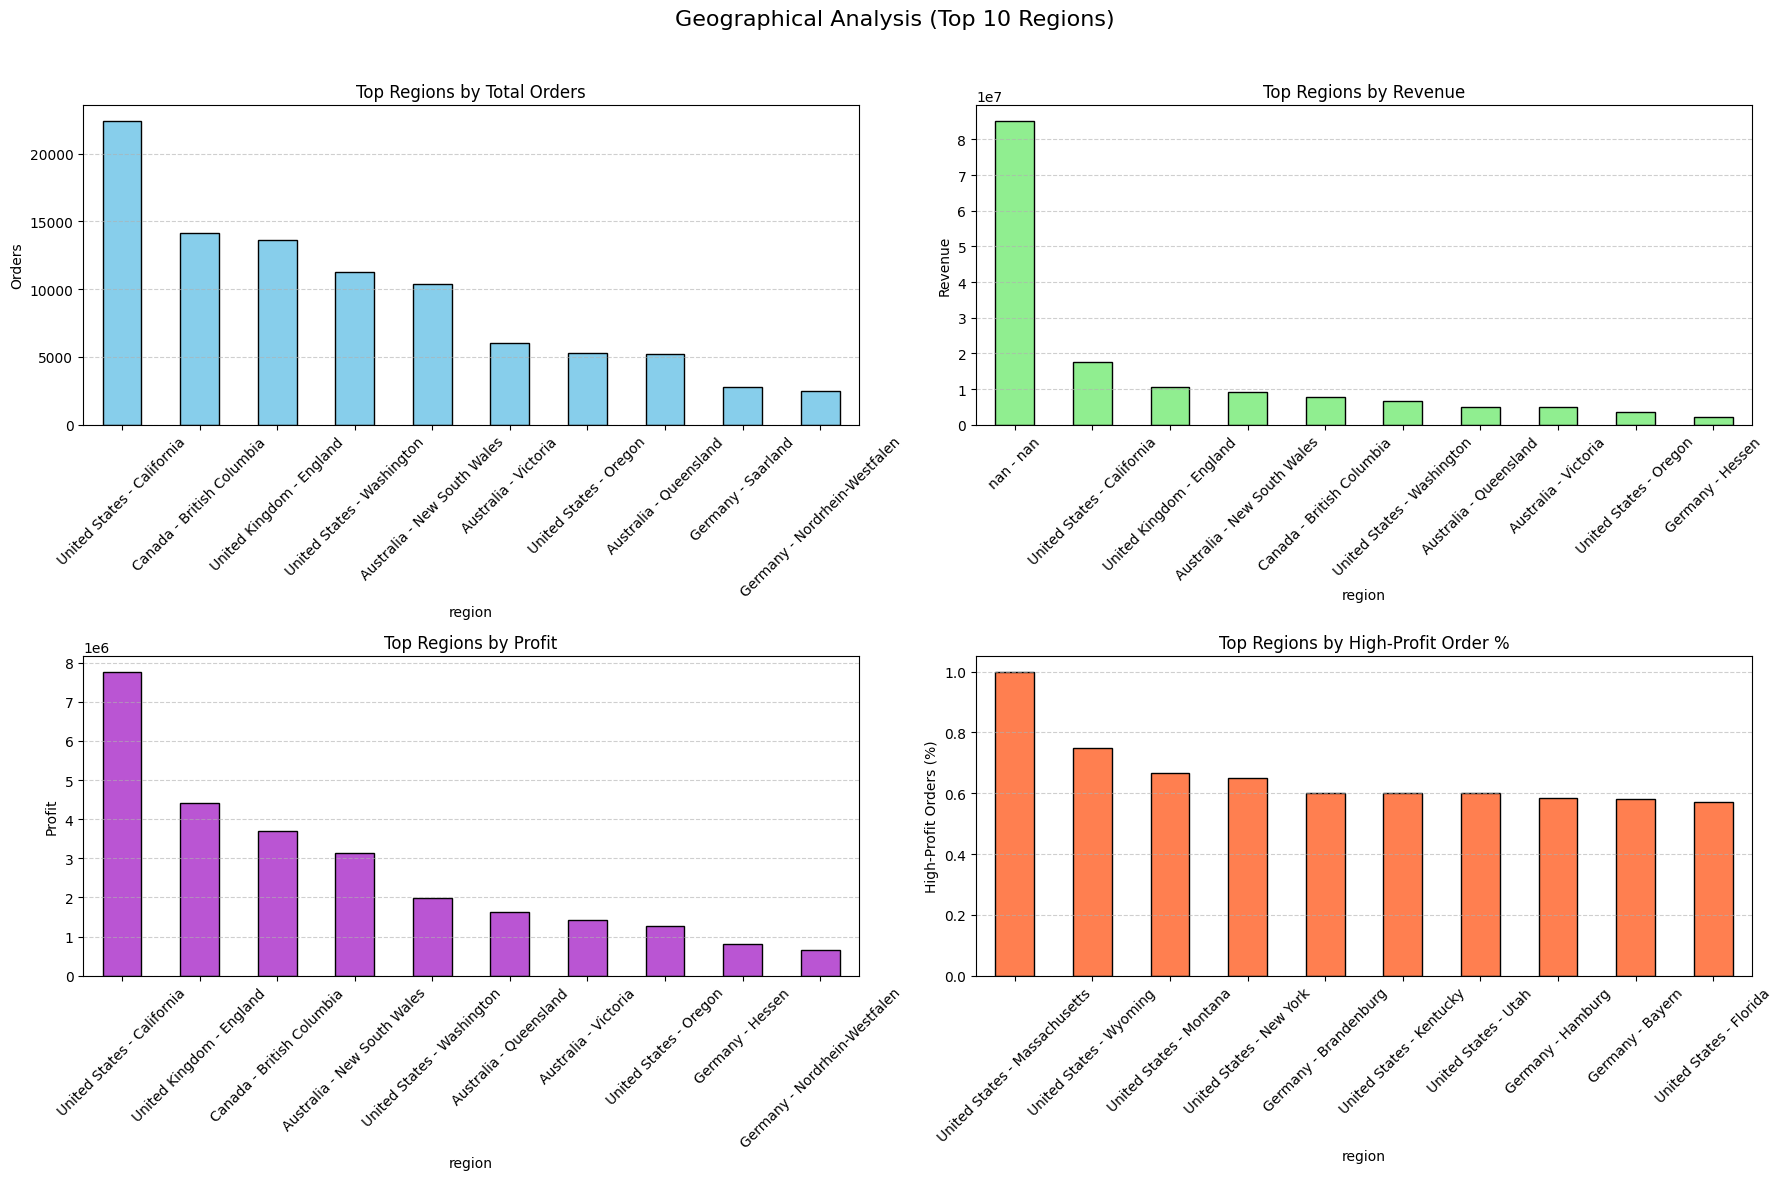

In [15]:
import matplotlib.pyplot as plt

# Ensure the 'region' column exists
df['region'] = df['country'].astype(str) + ' - ' + df['state'].astype(str)

# Prepare data
region_order_count = df['region'].value_counts().head(10)
region_revenue = df.groupby('region')['revenue'].sum().sort_values(ascending=False).head(10)
region_profit = df.groupby('region')['profit'].sum().sort_values(ascending=False).head(10)
region_high_profit_ratio = df.groupby('region')['is_high_profit_value'].mean().sort_values(ascending=False).head(10)

# Plotting 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("Geographical Analysis (Top 10 Regions)", fontsize=16)

# Plot 1: Total Orders
region_order_count.plot(kind='bar', ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Top Regions by Total Orders')
axes[0, 0].set_ylabel('Orders')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.6)

# Plot 2: Total Revenue
region_revenue.plot(kind='bar', ax=axes[0, 1], color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Top Regions by Revenue')
axes[0, 1].set_ylabel('Revenue')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.6)

# Plot 3: Total Profit
region_profit.plot(kind='bar', ax=axes[1, 0], color='mediumorchid', edgecolor='black')
axes[1, 0].set_title('Top Regions by Profit')
axes[1, 0].set_ylabel('Profit')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.6)

# Plot 4: High-Profit Order %
region_high_profit_ratio.plot(kind='bar', ax=axes[1, 1], color='coral', edgecolor='black')
axes[1, 1].set_title('Top Regions by High-Profit Order %')
axes[1, 1].set_ylabel('High-Profit Orders (%)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


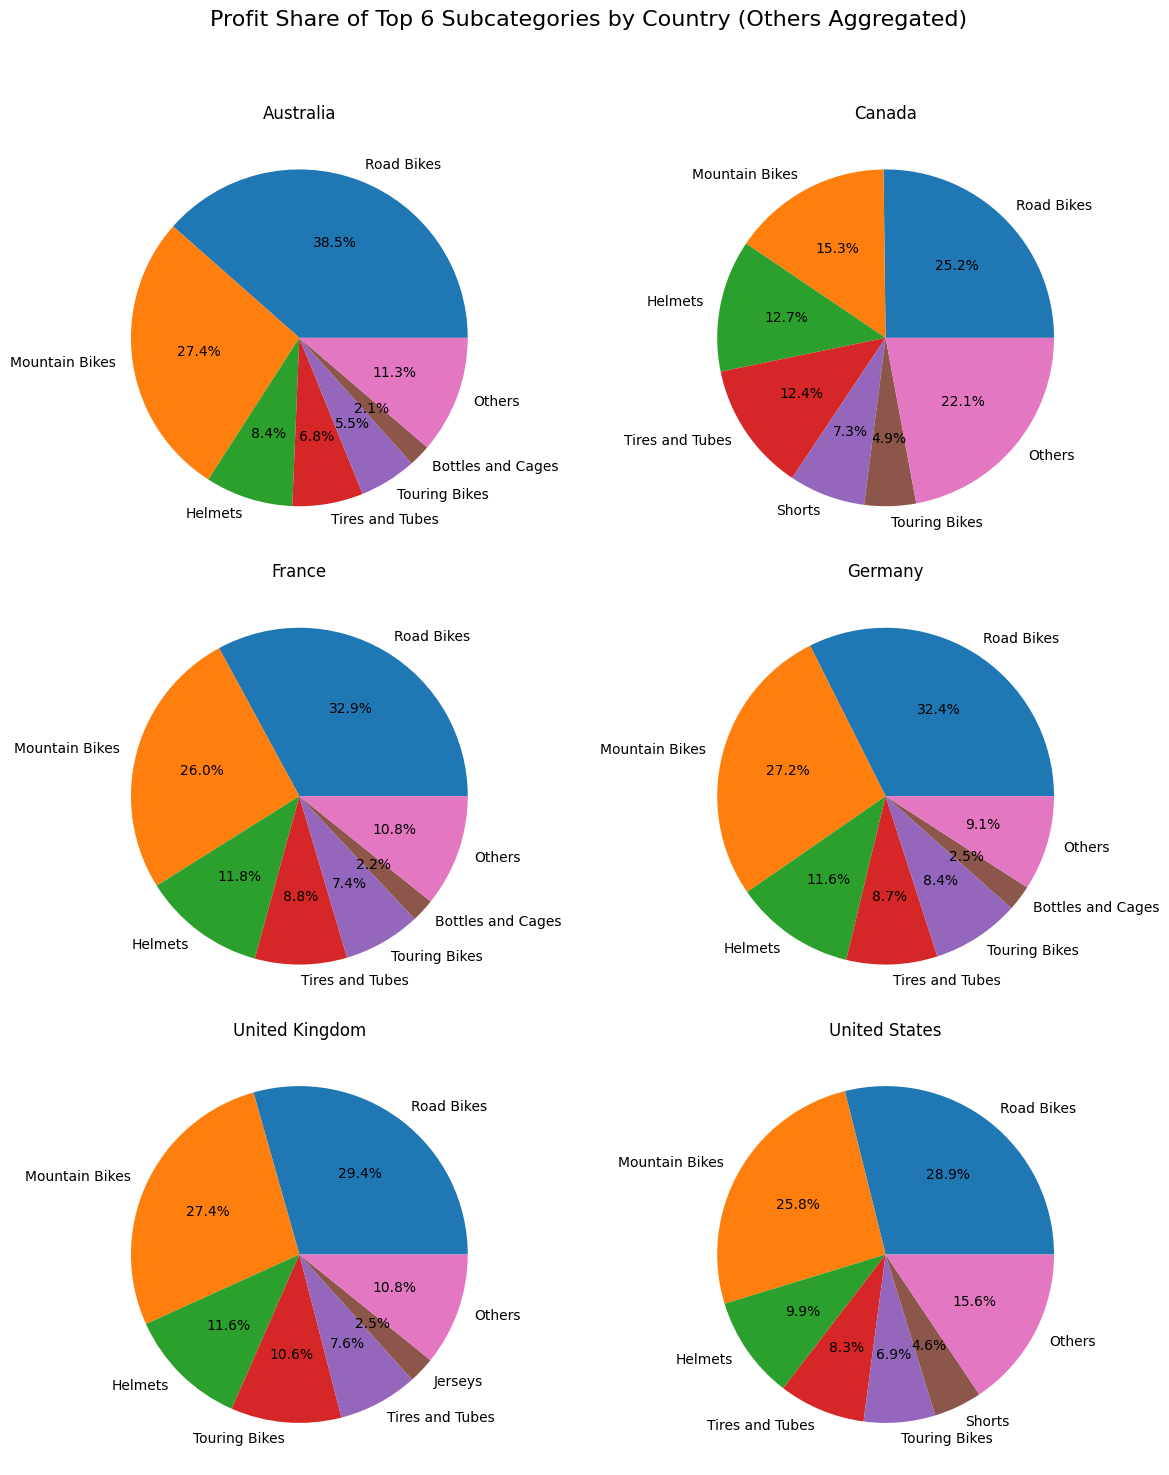

In [16]:
# Step 1: Group by country and subcategory, sum profits
subcat_profits = df.groupby(['country', 'sub_category'])['profit'].sum().reset_index()

# Step 2: Calculate total profit per country
country_totals = subcat_profits.groupby('country')['profit'].sum().reset_index()
country_totals = country_totals.rename(columns={'profit': 'country_profit'})

# Step 3: Merge to calculate profit share and identify top 6 subcategories
merged = subcat_profits.merge(country_totals, on='country')
merged['share'] = (merged['profit'] / merged['country_profit']) * 100

# Step 4: For each country, get top 6 subcategories and aggregate others
countries = merged['country'].unique()
all_data = []
for country in countries:
    country_data = merged[merged['country'] == country]
    # Sort by profit and get top 6
    top_6 = country_data.nlargest(6, 'profit')
    # Calculate "Others" if there are more than 6 subcategories
    others = country_data[~country_data['sub_category'].isin(top_6['sub_category'])]
    if not others.empty:
        others_profit = others['profit'].sum()
        others_share = (others_profit / country_data['country_profit'].iloc[0]) * 100
        others_row = pd.DataFrame({
            'country': [country],
            'sub_category': ['Others'],
            'profit': [others_profit],
            'country_profit': [country_data['country_profit'].iloc[0]],
            'share': [others_share]
        })
        country_data = pd.concat([top_6, others_row], ignore_index=True)
    else:
        country_data = top_6
    all_data.append(country_data)

# Combine all country data
plot_data = pd.concat(all_data, ignore_index=True)

# Step 5: Create faceted pie charts
n_countries = len(countries)
cols = 2  # 2 columns
rows = int(np.ceil(n_countries / cols))  # Dynamic rows

fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
if n_countries == 1:
    axes = [axes]
elif rows == 1:
    axes = axes if isinstance(axes, np.ndarray) else [axes]
else:
    axes = axes.flatten()

# Plot pie chart for each country
for i, country in enumerate(countries):
    ax = axes[i]
    country_data = plot_data[plot_data['country'] == country]
    ax.pie(country_data['share'], labels=country_data['sub_category'], autopct='%1.1f%%')
    ax.set_title(country, fontsize=12)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add suptitle and adjust layout
fig.suptitle('Profit Share of Top 6 Subcategories by Country (Others Aggregated)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

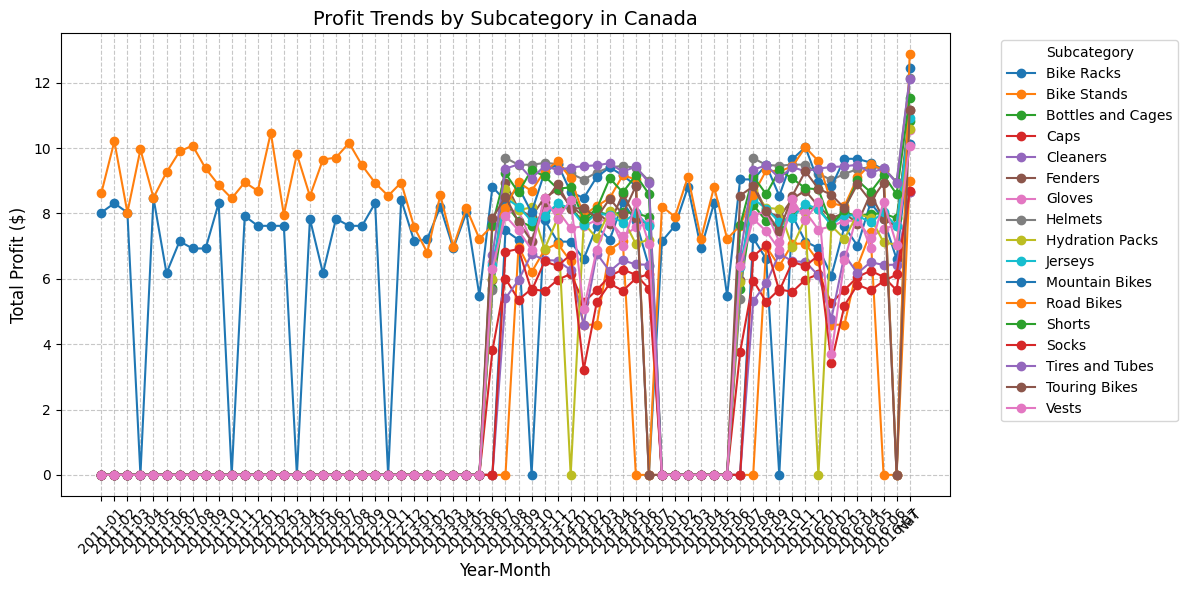

In [24]:
# Function to extract time axis (year-month or date)
def extract_time_axis(df):
    date_columns = ['year-month', 'date', 'order_date']
    found_column = None
    for col in date_columns:
        if col in df.columns:
            found_column = col
            break
    
    if found_column is None:
        print("Error: No date-related column found. Available columns:", df.columns)
        print("Expected one of: 'year-month', 'date', 'order_date'")
        raise ValueError("No date-related column found.")
    
    # Convert to datetime and extract year-month
    if found_column in ['date', 'order_date']:
        df['year-month'] = pd.to_datetime(df[found_column], errors='coerce').dt.to_period('M').astype(str)
    elif found_column == 'year-month':
        # Validate year-month format (e.g., '2023-01')
        df['year-month'] = pd.to_datetime(df['year-month'], format='%Y-%m', errors='coerce').dt.to_period('M').astype(str)
    
    # Handle invalid dates
    if df['year-month'].isna().any():
        print(f"Warning: Some rows have invalid dates in '{found_column}'. These are excluded.")
        df = df.dropna(subset=['year-month'])
    
    return df

# Apply time axis extraction
try:
    df = extract_time_axis(df)
except ValueError as e:
    print("Script terminated due to error:", e)
    exit()

# Filter for Canada
df_canada = df[df['country'] == 'Canada'].copy()

# Check if Canada data exists
if df_canada.empty:
    print("Error: No data found for Canada. Available countries:", df['country'].unique())
    exit()

# Step 1: Group by year-month and subcategory, sum profits
profit_trends = df_canada.groupby(['year-month', 'sub_category'])['profit'].sum().reset_index()

# Step 2: Apply log transformation to profit
profit_trends['log_profit'] = np.log1p(profit_trends['profit'])

# Step 2: Pivot to get subcategories as columns
pivot_table = profit_trends.pivot(index='year-month', columns='sub_category', values='log_profit').fillna(0)

# Step 3: Create time-series line plot
plt.figure(figsize=(12, 6))
for subcat in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[subcat], marker='o', label=subcat)

# Customize the plot
plt.title('Profit Trends by Subcategory in Canada', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)
plt.legend(title='Subcategory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

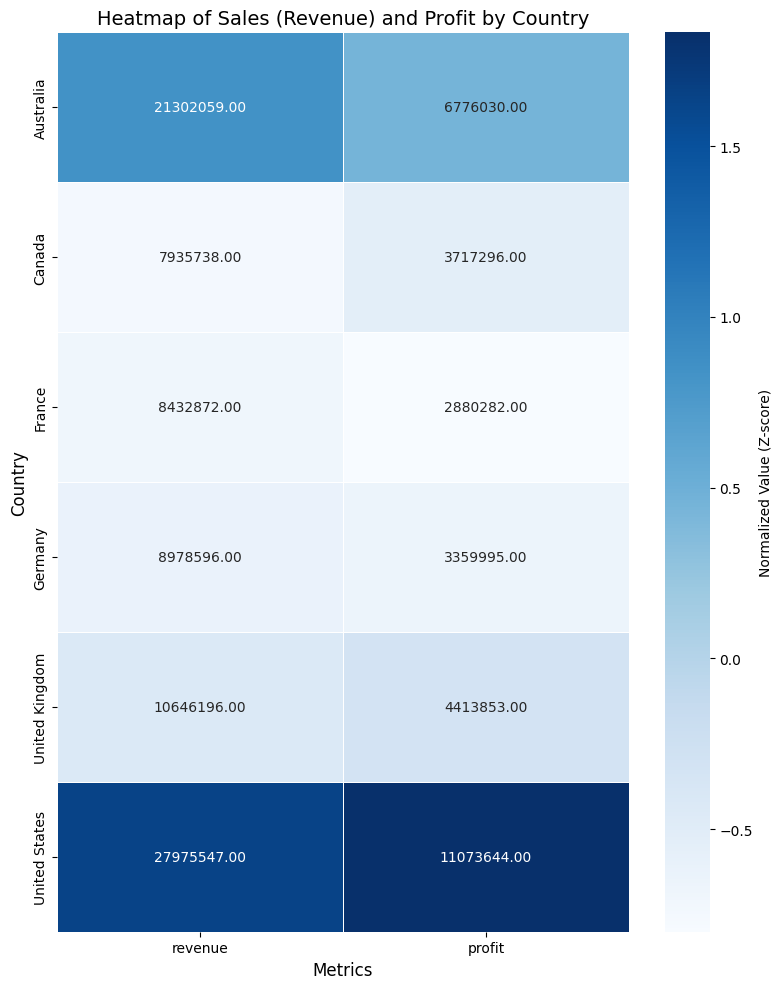

In [26]:
# Step 1: Group by country, sum revenue and profit
agg_data = df.groupby('country')[['revenue', 'profit']].sum().reset_index()

# Check if data is empty
if agg_data.empty:
    print("Error: No data available after grouping by country.")
    exit()

# Step 2: Normalize data (z-scores) for heatmap comparability
heatmap_data = agg_data.set_index('country')[['revenue', 'profit']]
heatmap_data = (heatmap_data - heatmap_data.mean()) / heatmap_data.std()  # Z-score normalization

# Step 3: Create heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(
    heatmap_data,
    annot=agg_data.set_index('country')[['revenue', 'profit']].round(2),  # Show original values
    fmt='.2f',
    cmap='Blues',
    cbar_kws={'label': 'Normalized Value (Z-score)'},
    linewidths=0.5
)

# Customize the plot
plt.title('Heatmap of Sales (Revenue) and Profit by Country', fontsize=14)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

### Profitability Analysis – Key Business Questions

1. **Which products generate the highest profit?**
   > Find out what items drive the bottom line.

2. **Which products have the highest profit margin?**
   > Identify efficient earners—products that give the most return per dollar sold.

3. **Which product categories or sub-categories are most profitable?**
   > See which areas of your catalog are financially strongest.

4. **How does profit vary by unit cost and unit price?**
   > Understand how pricing and cost affect profitability.

5. **Are there products with high revenue but low profit?**
   > Detect misleading top-sellers that don’t contribute much to profit.

C:\Users\patti\AppData\Local\Temp\ipykernel_19096\174338701.py:65: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
c:\Users\patti\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


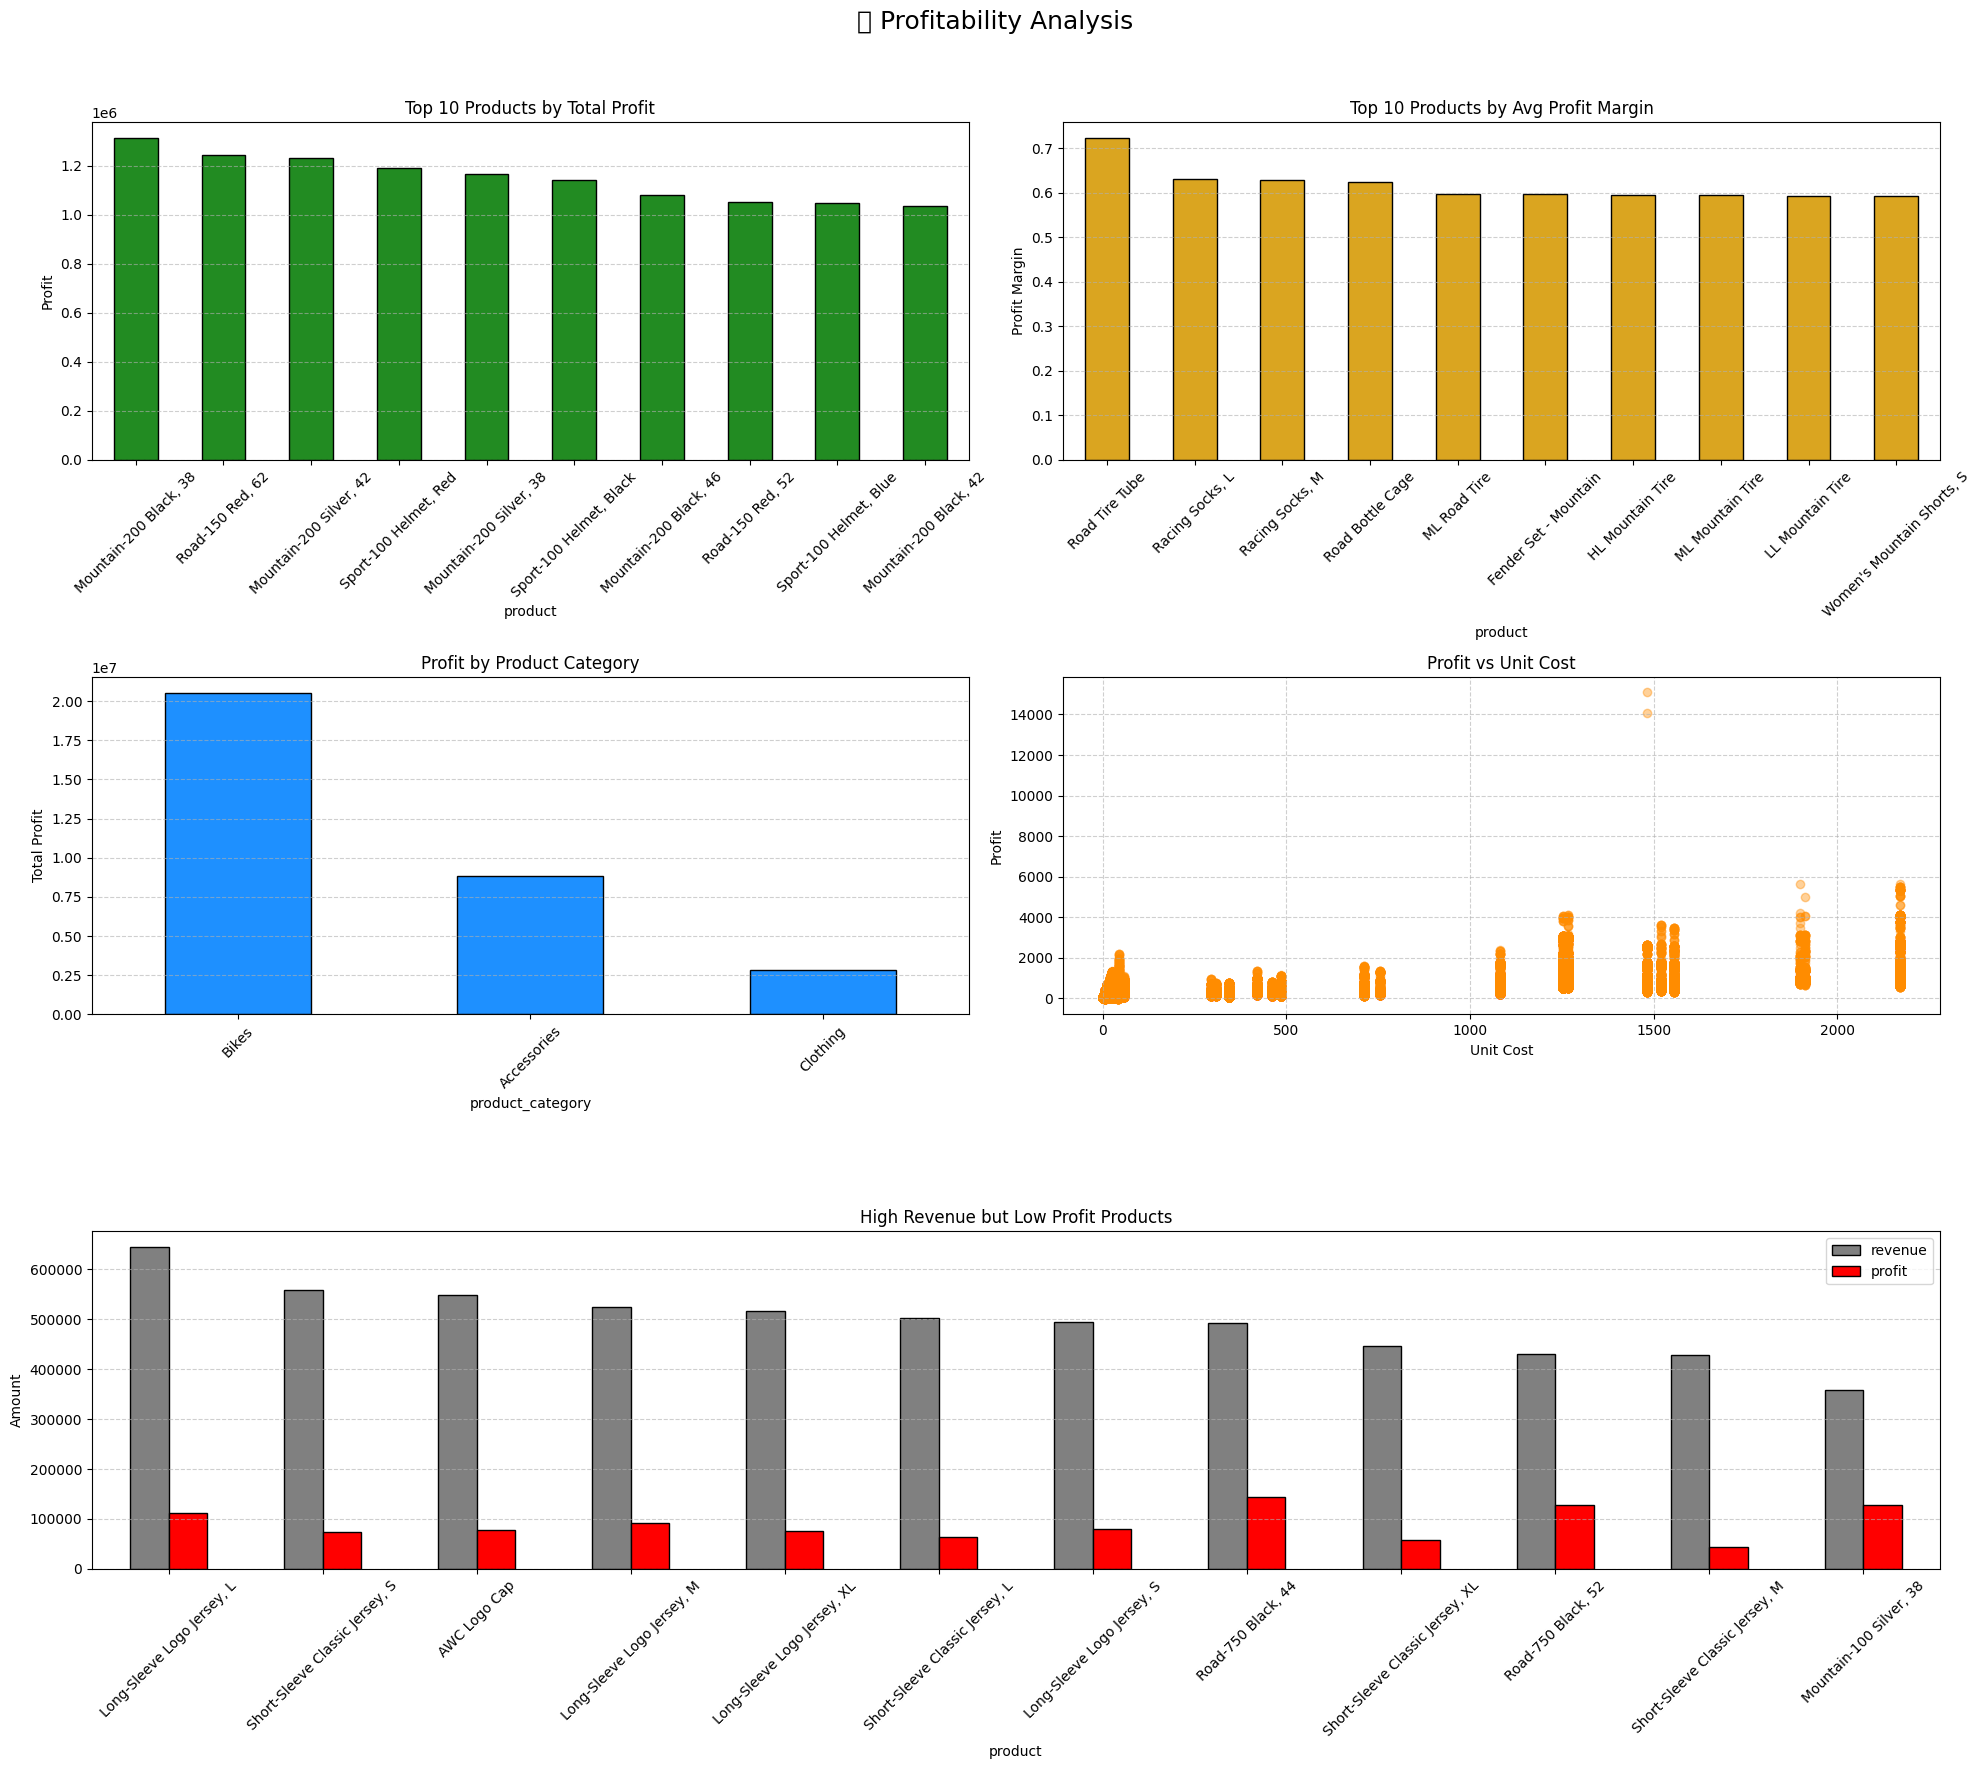

In [18]:
import matplotlib.pyplot as plt

# Ensure profit_margin is calculated
df['profit_margin'] = df['profit'] / df['revenue']
df['profit_margin'] = df['profit_margin'].replace([float('inf'), -float('inf')], None)

# Prepare datasets
top_profit = df.groupby('product')['profit'].sum().sort_values(ascending=False).head(10)
top_margin = df.groupby('product')['profit_margin'].mean().sort_values(ascending=False).head(10)
category_profit = df.groupby('product_category')['profit'].sum().sort_values(ascending=False)
unit_cost = df['unit_cost']
profit = df['profit']

# High revenue but low profit products
product_profitability = df.groupby('product')[['revenue', 'profit']].sum()
filtered = product_profitability[
    (product_profitability['revenue'] > product_profitability['revenue'].median()) &
    (product_profitability['profit'] < product_profitability['profit'].median())
].sort_values('revenue', ascending=False)

# Plot: 2x2 + 1 layout
fig = plt.figure(figsize=(20, 18))
fig.suptitle("💰 Profitability Analysis", fontsize=18)

# 1. Top Products by Profit
ax1 = fig.add_subplot(3, 2, 1)
top_profit.plot(kind='bar', color='forestgreen', edgecolor='black', ax=ax1)
ax1.set_title('Top 10 Products by Total Profit')
ax1.set_ylabel('Profit')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.6)

# 2. Top Products by Profit Margin
ax2 = fig.add_subplot(3, 2, 2)
top_margin.plot(kind='bar', color='goldenrod', edgecolor='black', ax=ax2)
ax2.set_title('Top 10 Products by Avg Profit Margin')
ax2.set_ylabel('Profit Margin')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', linestyle='--', alpha=0.6)

# 3. Profit by Product Category
ax3 = fig.add_subplot(3, 2, 3)
category_profit.plot(kind='bar', color='dodgerblue', edgecolor='black', ax=ax3)
ax3.set_title('Profit by Product Category')
ax3.set_ylabel('Total Profit')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', linestyle='--', alpha=0.6)

# 4. Profit vs Unit Cost
ax4 = fig.add_subplot(3, 2, 4)
ax4.scatter(unit_cost, profit, alpha=0.4, color='darkorange')
ax4.set_title('Profit vs Unit Cost')
ax4.set_xlabel('Unit Cost')
ax4.set_ylabel('Profit')
ax4.grid(True, linestyle='--', alpha=0.6)

# 5. High Revenue, Low Profit Products
ax5 = fig.add_subplot(3, 1, 3)
filtered.plot(kind='bar', ax=ax5, color=['gray', 'red'], edgecolor='black')
ax5.set_title('High Revenue but Low Profit Products')
ax5.set_ylabel('Amount')
ax5.tick_params(axis='x', rotation=45)
ax5.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Sales Performance – Key Business Questions

1. **What is the trend of sales over time?**
   > Track revenue and quantity sold monthly.

2. **Which months or seasons show sales spikes?**
   > Discover peak demand periods to plan marketing and inventory.

3. **Which products have the highest total sales volume?**
   > Identify the most frequently ordered products.

4. **What is the average order quantity per product?**
   > Understand buying patterns to optimize stock.

5. **How do unit cost and quantity relate to revenue?**
   > Analyze the link between product pricing, volume, and total income.


C:\Users\patti\AppData\Local\Temp\ipykernel_19096\3545961335.py:46: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
c:\Users\patti\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


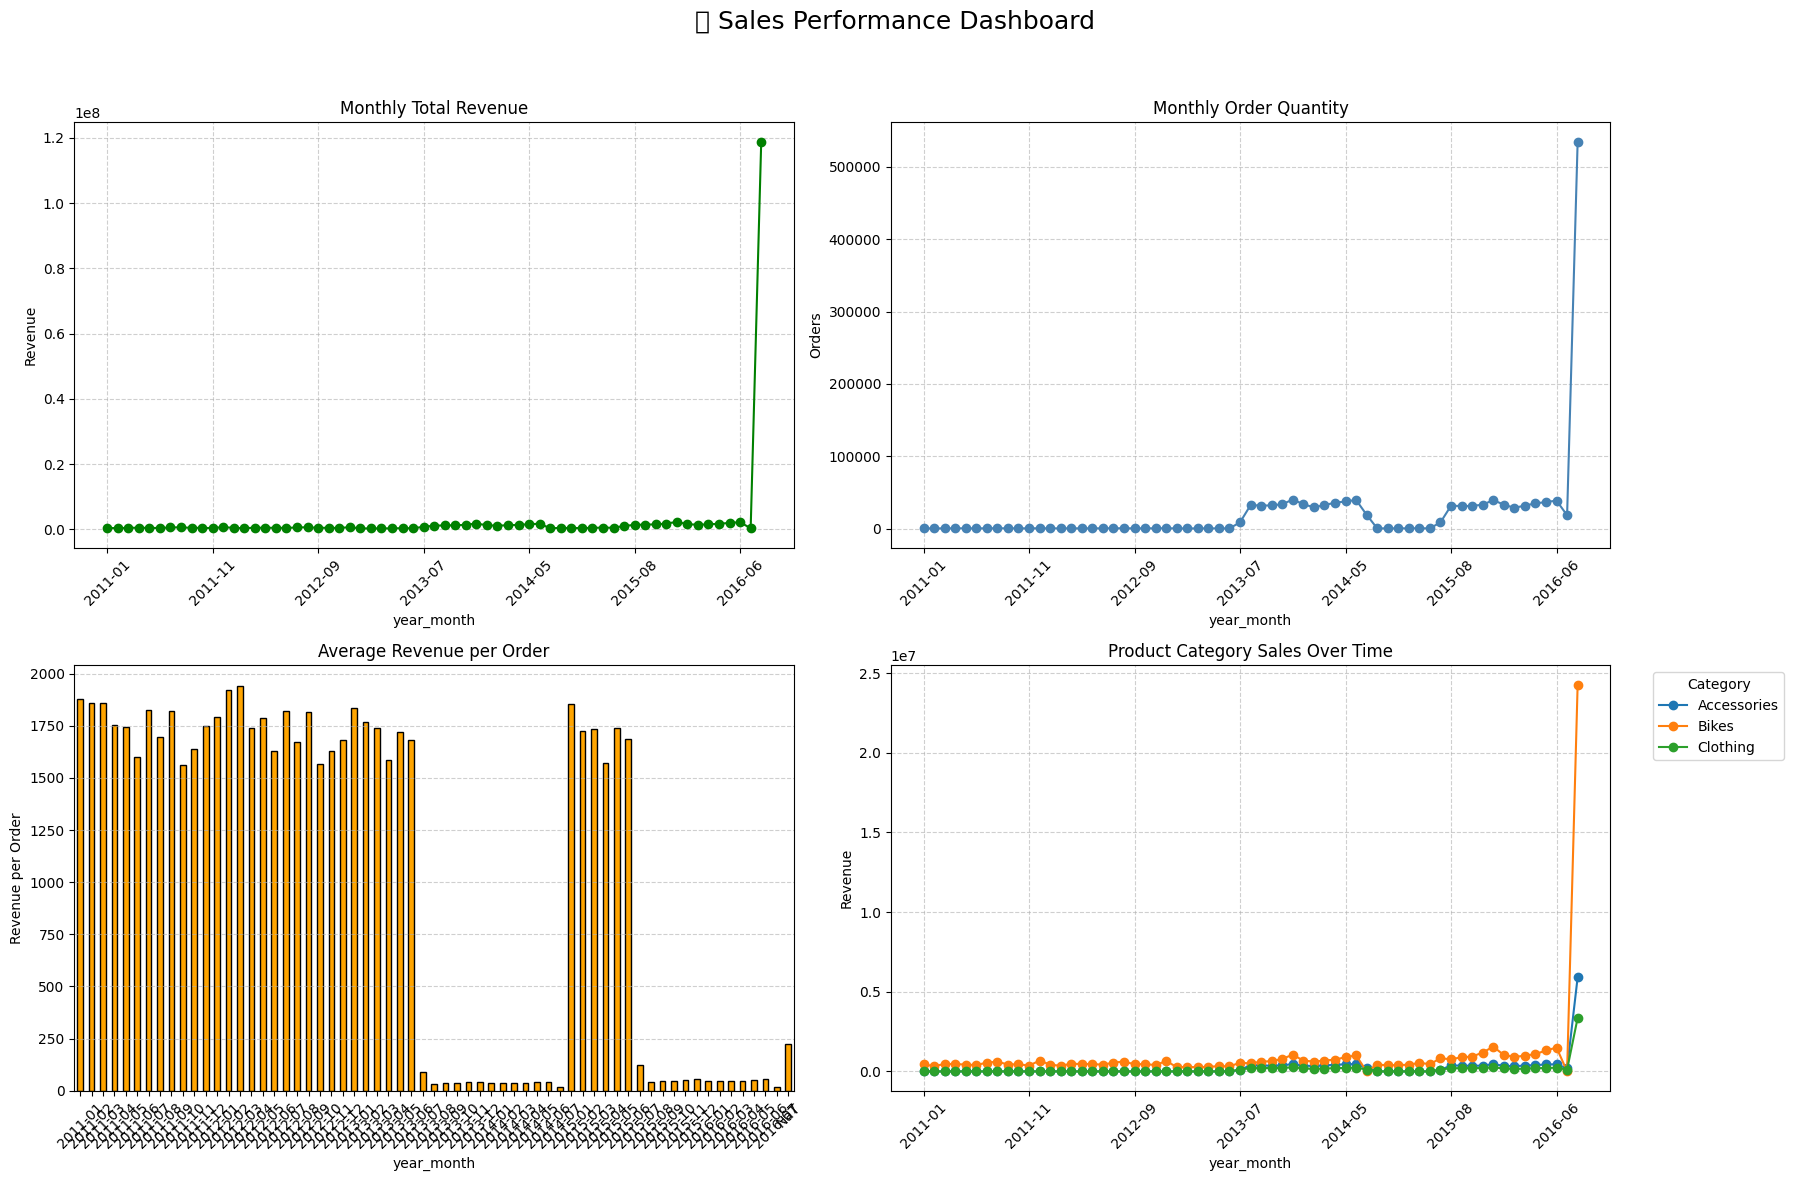

In [19]:
import matplotlib.pyplot as plt

# Prepare date-based fields
df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.to_period('M').astype(str)

# Data
monthly_revenue = df.groupby('year_month')['revenue'].sum()
monthly_orders = df.groupby('year_month')['order_quantity'].sum()
monthly_avg_revenue = monthly_revenue / monthly_orders
category_trend = df.groupby(['year_month', 'product_category'])['revenue'].sum().unstack().fillna(0)

# Plotting layout
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("📦 Sales Performance Dashboard", fontsize=18)

# 1. Monthly Revenue
monthly_revenue.plot(kind='line', marker='o', ax=axes[0, 0], color='green')
axes[0, 0].set_title('Monthly Total Revenue')
axes[0, 0].set_ylabel('Revenue')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, linestyle='--', alpha=0.6)

# 2. Monthly Orders
monthly_orders.plot(kind='line', marker='o', ax=axes[0, 1], color='steelblue')
axes[0, 1].set_title('Monthly Order Quantity')
axes[0, 1].set_ylabel('Orders')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, linestyle='--', alpha=0.6)

# 3. Avg Revenue per Order
monthly_avg_revenue.plot(kind='bar', ax=axes[1, 0], color='orange', edgecolor='black')
axes[1, 0].set_title('Average Revenue per Order')
axes[1, 0].set_ylabel('Revenue per Order')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.6)

# 4. Category Trend
category_trend.plot(kind='line', marker='o', ax=axes[1, 1])
axes[1, 1].set_title('Product Category Sales Over Time')
axes[1, 1].set_ylabel('Revenue')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, linestyle='--', alpha=0.6)
axes[1, 1].legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Product Performance

### Which categories are the most profitable? (product_category, sub_category, product)

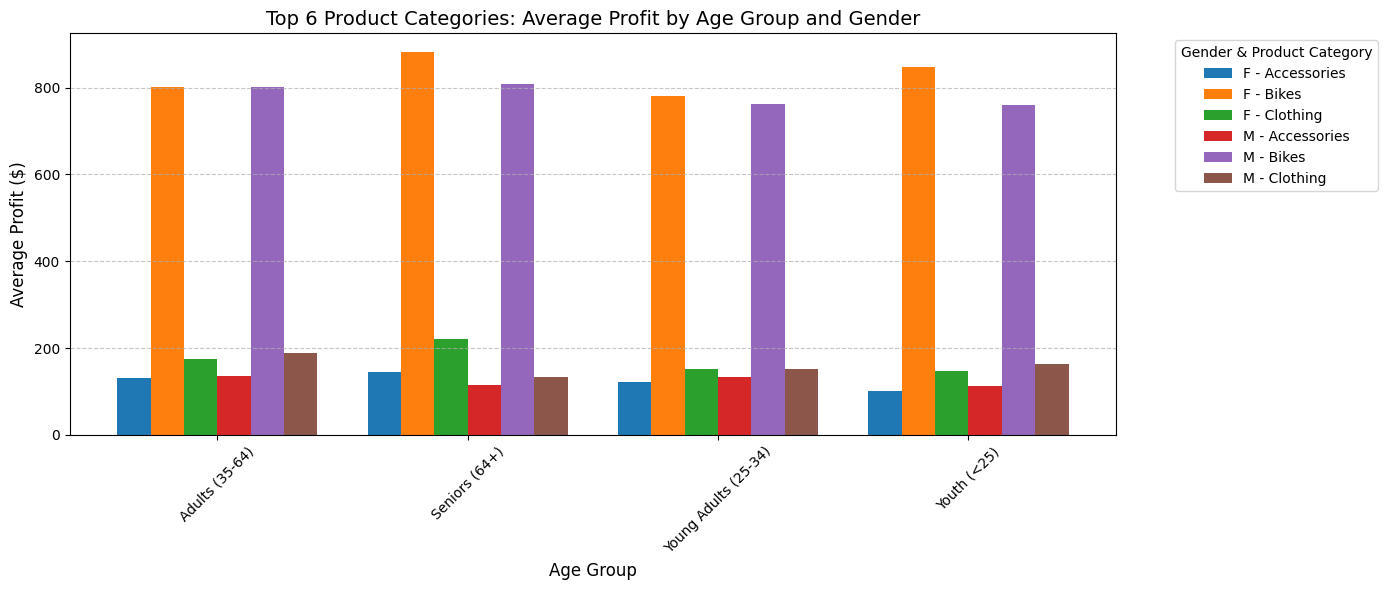

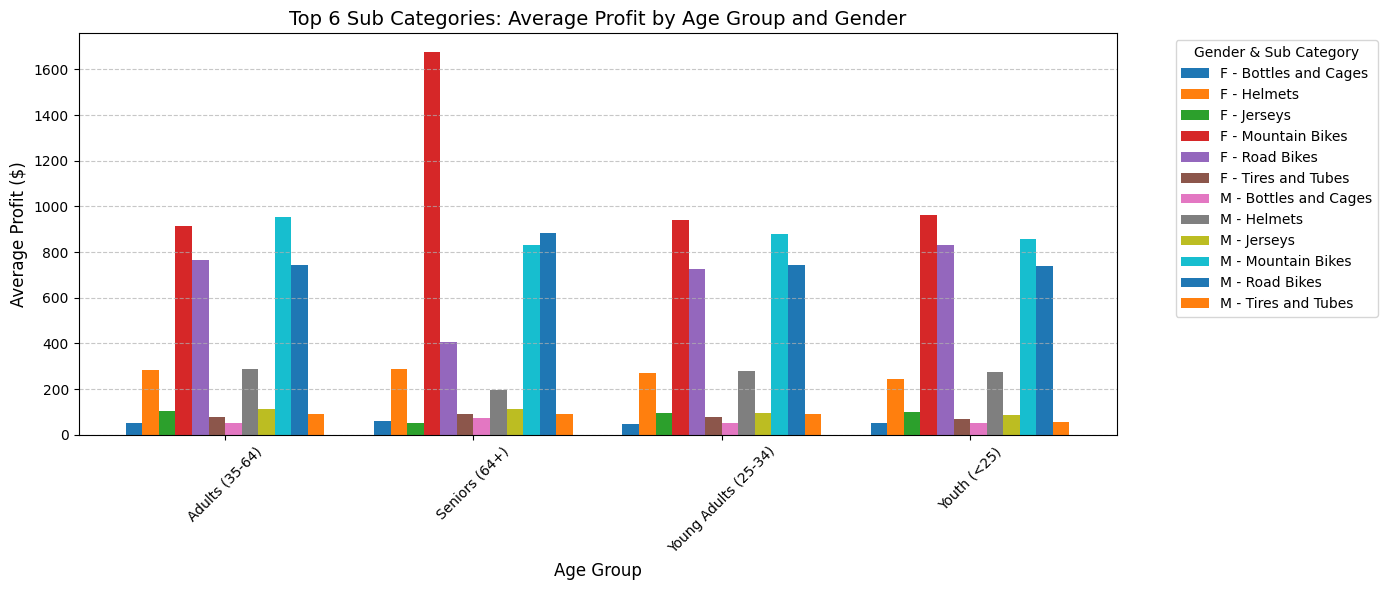

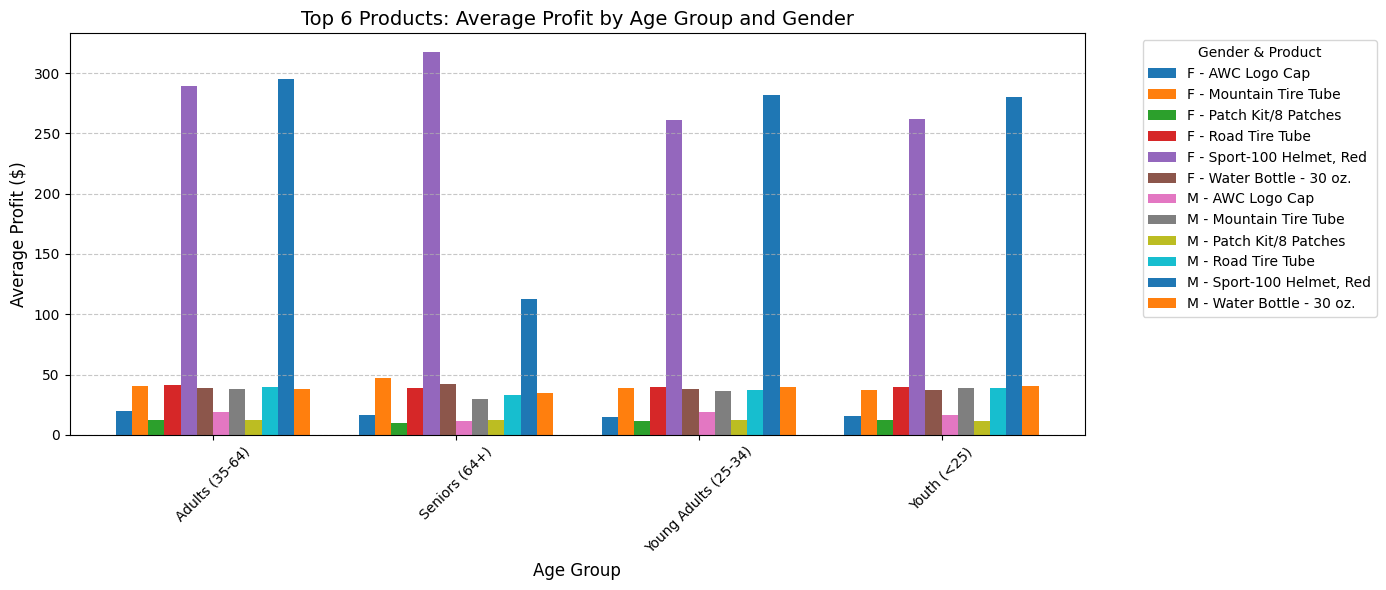

In [20]:
# Function to create a grouped bar plot for average profit
def plot_high_profit_by_group(df, group_col, title, filename, top_n=6):
    # Get top N most frequent values in the grouping column
    top_values = df[group_col].value_counts().head(top_n).index.tolist()
    
    # Filter DataFrame to include only top N values
    df_filtered = df[df[group_col].isin(top_values)]
    
    # Calculate average profit by age group, gender, and group_col
    pivot_table = df_filtered.pivot_table(values='profit', 
                                         index='age_group', 
                                         columns=['customer_gender', group_col], 
                                         aggfunc='mean', 
                                         fill_value=0)
    
    # Plotting the grouped bar chart
    plt.figure(figsize=(14, 6))
    age_groups = pivot_table.index
    n_groups = len(age_groups)
    n_combinations = len(pivot_table.columns)
    bar_width = 0.8 / n_combinations  # Adjust width to fit all bars
    index = np.arange(n_groups)
    
    # Plot bars for each gender and group_col combination
    for i, col in enumerate(pivot_table.columns):
        gender, category = col
        label = f"{gender} - {category}"
        plt.bar(index + i * bar_width, pivot_table[col], bar_width, label=label, color=plt.cm.tab10(i % 10))
    
    # Customize the plot
    plt.title(title, fontsize=14)
    plt.xlabel('Age Group', fontsize=12)
    plt.ylabel('Average Profit ($)', fontsize=12)
    plt.xticks(index + bar_width * (n_combinations - 1) / 2, age_groups, rotation=45)
    plt.legend(title='Gender & ' + group_col.replace('_', ' ').title(), 
               bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot 1: Top 6 Product Categories
plot_high_profit_by_group(
    df, 
    'product_category', 
    'Top 6 Product Categories: Average Profit by Age Group and Gender', 
    'top6_average_profit_by_product_category_grouped.png'
)

# Plot 2: Top 6 Sub Categories
plot_high_profit_by_group(
    df, 
    'sub_category', 
    'Top 6 Sub Categories: Average Profit by Age Group and Gender', 
    'top6_average_profit_by_sub_category_grouped.png'
)

# Plot 3: Top 6 Products
plot_high_profit_by_group(
    df, 
    'product', 
    'Top 6 Products: Average Profit by Age Group and Gender', 
    'top6_average_profit_by_product_grouped.png'
)


### Ranking for Categories among all data

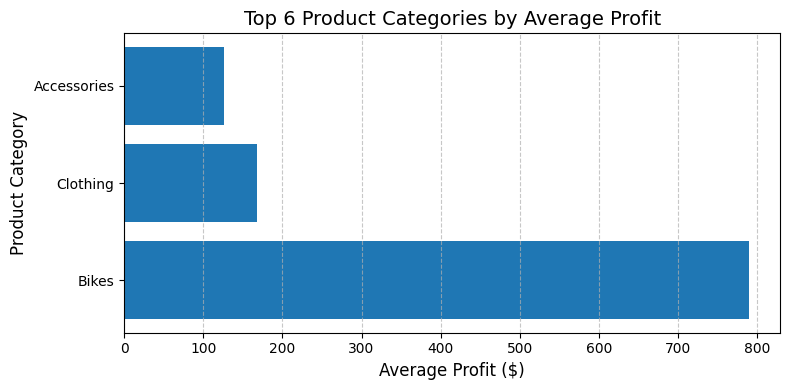

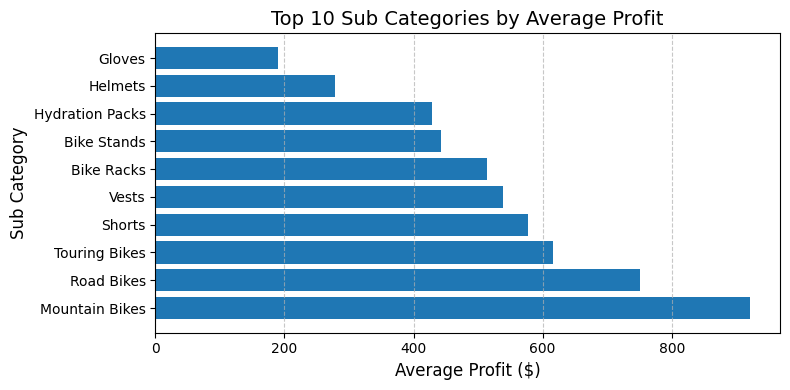

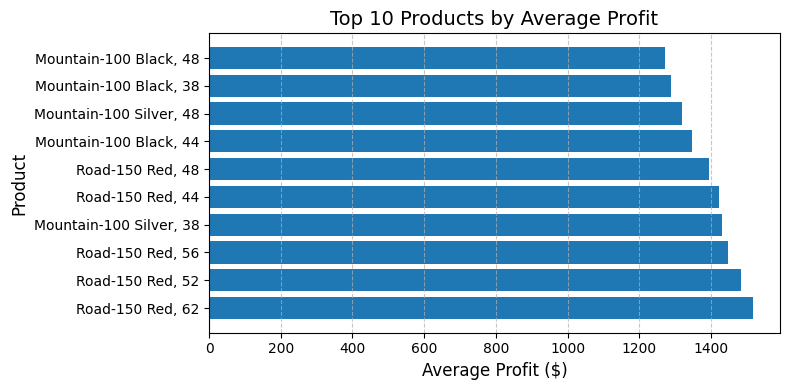

In [21]:
# Function to calculate and plot top 6 by average profit
def plot_high_profit_by_group(df, group_col, title, top_n=6):
    # Calculate average profit for each group value
    ranking = df.groupby(group_col)['profit'].mean().reset_index()
    # Sort by average profit in descending order and get top N
    ranking = ranking.sort_values(by='profit', ascending=False).head(top_n)
    # Rename columns for clarity
    ranking.columns = [group_col.replace('_', ' ').title(), 'Average Profit']
    
    # Create horizontal bar plot
    plt.figure(figsize=(8, 4))
    plt.barh(ranking[group_col.replace('_', ' ').title()], 
             ranking['Average Profit'], 
             color='#1f77b4')
    
    # Customize the plot
    plt.title(title, fontsize=14)
    plt.xlabel('Average Profit ($)', fontsize=12)
    plt.ylabel(group_col.replace('_', ' ').title(), fontsize=12)
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot 1: Top 6 Product Categories
plot_high_profit_by_group(
    df, 
    'product_category', 
    'Top 6 Product Categories by Average Profit', 
    6,
)

# Plot 2: Top 10 Sub Categories
plot_high_profit_by_group(
    df, 
    'sub_category', 
    'Top 10 Sub Categories by Average Profit', 
    10,
)

# Plot 3: Top 10 Products
plot_high_profit_by_group(
    df, 
    'product', 
    'Top 10 Products by Average Profit', 
    10,
)

### Ranking for Categories Segmented by Age Group and Gender

In [22]:
def rank_high_profit_by_group_segmented(df, group_col, segment_cols, top_n=6):
    # Group by segment (age_group, customer_gender) and group_col
    ranking = df.groupby(segment_cols + [group_col])['profit'].mean().reset_index()
    # Initialize an empty DataFrame to store results
    all_rankings = pd.DataFrame()
    
    # Iterate over unique segment combinations
    for segment, segment_df in ranking.groupby(segment_cols):
        # Sort by proportion and get top N
        segment_ranking = segment_df.sort_values(by='profit', ascending=False).head(top_n)
        # Add rank column
        segment_ranking['Rank'] = range(1, len(segment_ranking) + 1)
        # Add segment information for clarity
        segment_ranking['Segment'] = f"{segment[0]} - {segment[1]}"
        all_rankings = pd.concat([all_rankings, segment_ranking], ignore_index=True)
    
    # Rename columns for clarity
    all_rankings = all_rankings[['Segment', group_col, 'profit', 'Rank']]
    all_rankings.columns = ['Segment', group_col.replace('_', ' ').title(), 
                            'Average Profit', 'Rank']
    return all_rankings

# Define segment columns
segment_cols = ['age_group', 'customer_gender']

# Rank top 6 for each grouping column, segmented by age_group and customer_gender
product_category_ranking = rank_high_profit_by_group_segmented(df, 'product_category', segment_cols)
sub_category_ranking = rank_high_profit_by_group_segmented(df, 'sub_category', segment_cols)
product_ranking = rank_high_profit_by_group_segmented(df, 'product', segment_cols)

# Print rankings as formatted tables
print("\nTop 6 Product Categories by Average Profit (Segmented by Age Group and Gender):")
print(product_category_ranking.to_string(index=False))
print("\nTop 6 Sub Categories by Average Profit (Segmented by Age Group and Gender):")
print(sub_category_ranking.to_string(index=False))
print("\nTop 6 Products by Average Profit (Segmented by Age Group and Gender):")
print(product_ranking.to_string(index=False))


Top 6 Product Categories by Average Profit (Segmented by Age Group and Gender):
                 Segment Product Category  Average Profit  Rank
      Adults (35-64) - F            Bikes      801.570015     1
      Adults (35-64) - F         Clothing      174.811945     2
      Adults (35-64) - F      Accessories      130.885322     3
      Adults (35-64) - M            Bikes      802.251606     1
      Adults (35-64) - M         Clothing      189.367715     2
      Adults (35-64) - M      Accessories      134.462413     3
       Seniors (64+) - F            Bikes      881.166667     1
       Seniors (64+) - F         Clothing      220.869565     2
       Seniors (64+) - F      Accessories      144.570370     3
       Seniors (64+) - M            Bikes      807.394737     1
       Seniors (64+) - M         Clothing      132.678571     2
       Seniors (64+) - M      Accessories      115.890728     3
Young Adults (25-34) - F            Bikes      780.471563     1
Young Adults (25-34) - 

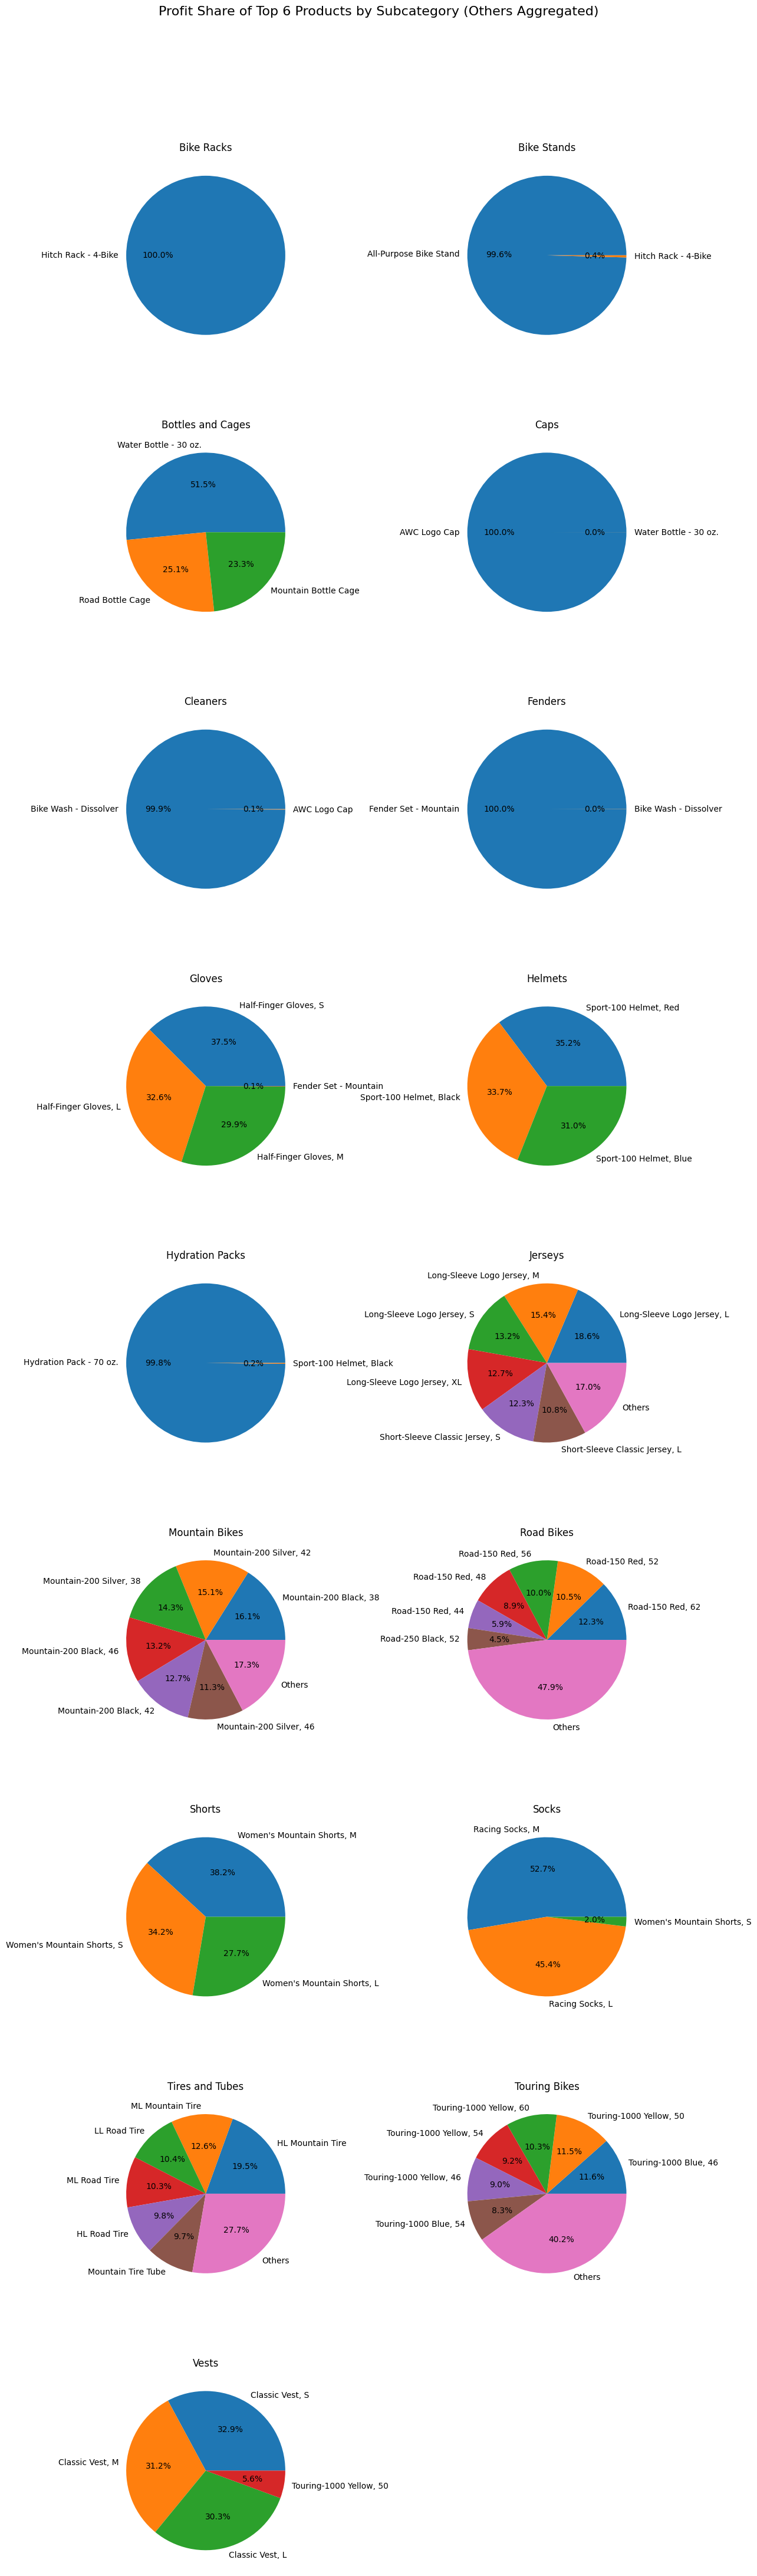

In [23]:
# Step 1: Group by subcategory and product, sum profits
product_profits = df.groupby(['sub_category', 'product'])['profit'].sum().reset_index()

# Step 2: Calculate total profit per subcategory
subcat_totals = product_profits.groupby('sub_category')['profit'].sum().reset_index()
subcat_totals = subcat_totals.rename(columns={'profit': 'subcat_profit'})

# Step 3: Merge to calculate profit share and identify top 6 products
merged = product_profits.merge(subcat_totals, on='sub_category')
merged['share'] = (merged['profit'] / merged['subcat_profit']) * 100

# Step 4: For each subcategory, get top 6 products and aggregate others
subcats = merged['sub_category'].unique()
all_data = []
for subcat in subcats:
    subcat_data = merged[merged['sub_category'] == subcat]
    # Sort by profit share and get top 6
    top_6 = subcat_data.nlargest(6, 'share')
    # Calculate "Others" if there are more than 6 products
    others = subcat_data[~subcat_data['product'].isin(top_6['product'])]
    if not others.empty:
        others_profit = others['profit'].sum()
        others_share = (others_profit / subcat_data['subcat_profit'].iloc[0]) * 100
        others_row = pd.DataFrame({
            'sub_category': [subcat],
            'product': ['Others'],
            'profit': [others_profit],
            'subcat_profit': [subcat_data['subcat_profit'].iloc[0]],
            'share': [others_share]
        })
        subcat_data = pd.concat([top_6, others_row], ignore_index=True)
    else:
        subcat_data = top_6
    all_data.append(subcat_data)

# Combine all subcategory data
plot_data = pd.concat(all_data, ignore_index=True)

# Step 5: Create faceted pie charts
n_subcats = len(subcats)
cols = 2  # 2 columns
rows = int(np.ceil(n_subcats / cols))  # Dynamic rows

fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
if n_subcats == 1:
    axes = [axes]
elif rows == 1:
    axes = axes if isinstance(axes, np.ndarray) else [axes]
else:
    axes = axes.flatten()

# Plot pie chart for each subcategory
for i, subcat in enumerate(subcats):
    ax = axes[i]
    subcat_data = plot_data[plot_data['sub_category'] == subcat]
    ax.pie(subcat_data['share'], labels=subcat_data['product'], autopct='%1.1f%%')
    ax.set_title(subcat, fontsize=12)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add suptitle and adjust layout
fig.suptitle('Profit Share of Top 6 Products by Subcategory (Others Aggregated)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()